<a href="https://colab.research.google.com/github/ShanmugapriyanManoharan/OpenCV-Projects/blob/master/Pedestrian_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pedestrian Detection using pre-trained HOG + Linear SVM Detector

In [0]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# Initializing the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [0]:
# Getting the image path
imagePaths = list(paths.list_images("/content/images/"))

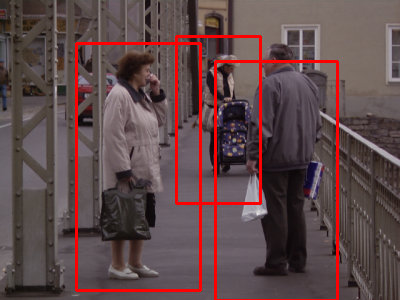

person_222.bmp: 3 Before NMS boxes, 3 after NMS


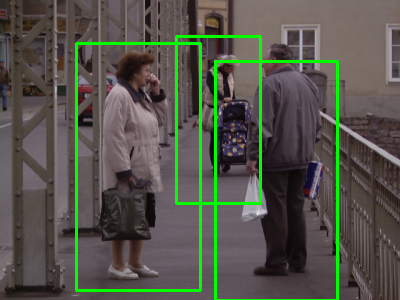

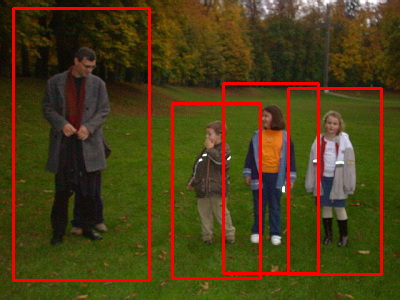

person_265.bmp: 4 Before NMS boxes, 4 after NMS


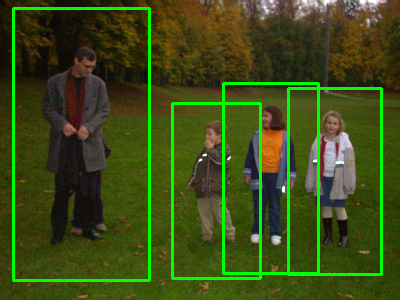

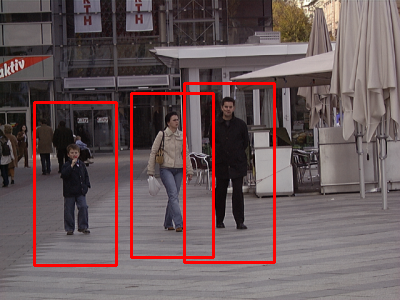

person_133.bmp: 3 Before NMS boxes, 3 after NMS


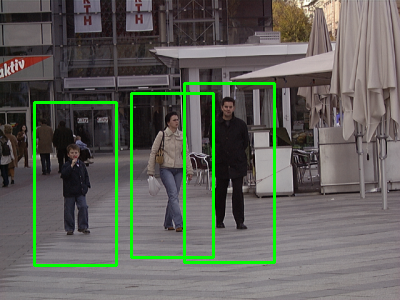

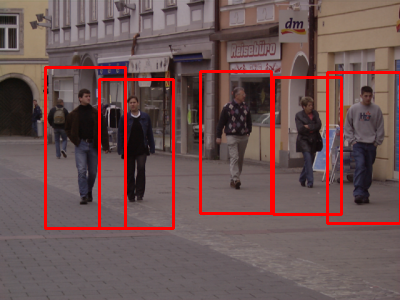

person_175.bmp: 5 Before NMS boxes, 5 after NMS


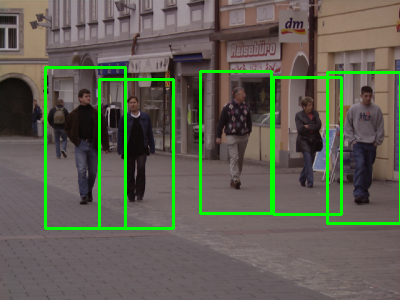

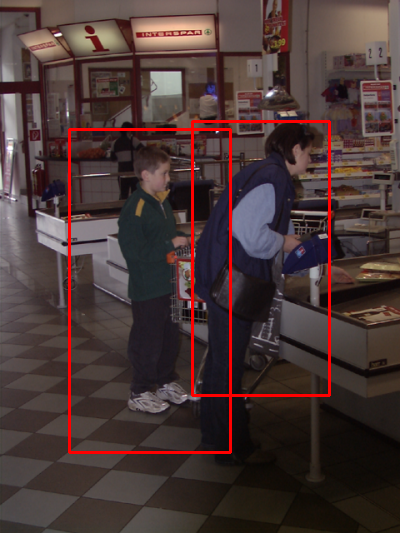

person_085.bmp: 2 Before NMS boxes, 2 after NMS


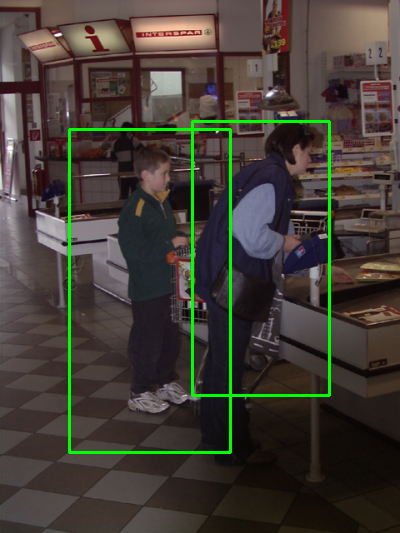

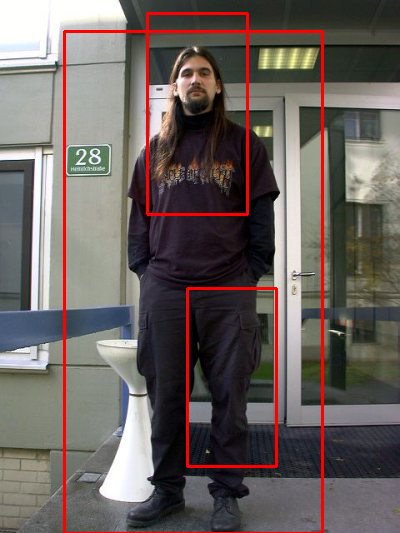

person_032.bmp: 3 Before NMS boxes, 1 after NMS


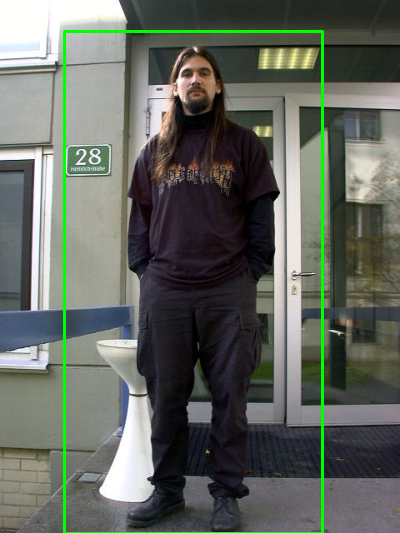

In [43]:
for imagePath in imagePaths:
  #print(type(imagePath))
  # load the image and resize the image using imutils to increase detection accuracy and reduce detection time
  image = cv2.imread(imagePath)
  #cv2_imshow(image)
  image = imutils.resize(image, width=min(400, image.shape[1]))
  orig = image.copy()

  # Detect people
  (rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
    padding=(8, 8), scale=1.05)

  # Draw bounding boxes
  for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

  # Applying Non-Maxima Suppression (NMS) to the bounding boxes with overlap threshold
  # to avoid skipping the boxes that are people
  rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
  pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

  # Draw bounding boxes (NMS)
  for (xA, yA, xB, yB) in pick:
    cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

  # Display output images
  cv2_imshow(orig)

  # Number of bounding boxes before and after NMS
  filename = imagePath[imagePath.rfind("/") + 1:]
  print("{}: {} Before NMS boxes, {} after NMS".format(
    filename, len(rects), len(pick)))
  
  cv2_imshow(image)